# SSD Multibox Implementation for Waste Detection

Paper = https://arxiv.org/pdf/1512.02325.pdf

Current state-of-the-art object detection systems are variants. SSD is a fast single-shot object detector fopr multiple categories.

In [1]:
#Install TensorFlow GPU
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 37kB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Cloning TFOD 2.0

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57400, done.
remote: Counting objects: 100% (1463/1463), done.
remote: Compressing objects: 100% (638/638), done.
remote: Total 57400 (delta 983), reused 1256 (delta 809), pack-reused 55937
Receiving objects: 100% (57400/57400), 572.94 MiB | 29.40 MiB/s, done.
Resolving deltas: 100% (39645/39645), done.


In [4]:
pwd 

'/content'

In [5]:
cd /content/models/research

/content/models/research


In [6]:
pwd

'/content/models/research'

In [7]:
!protoc object_detection/protos/*.proto --python_out=.

In [8]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 21.51 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [9]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [10]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [11]:
cp -r pycocotools /content/models/research

## Install The Object Detection API

In [12]:
cd ..

/content/models/research/cocoapi


In [13]:
cd ..

/content/models/research


In [14]:
cp object_detection/packages/tf2/setup.py .

In [15]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 7.1MB/s 
     |████████████████████████████████| 358kB 33.2MB/s 
     |████████████████████████████████| 1.6MB 32.0MB/s 
     |████████████████████████████████| 2.3MB 32.1MB/s 
     |████████████████████████████████| 829kB 23.6MB/s 
     |████████████████████████████████| 153kB 39.1MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 686kB 27.4MB/s 
     |████████████████████████████████| 102kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 24.0MB/s 
     |████████████████████████████████| 38.2MB 101kB/s 
     |████████████████████████████████| 645kB 30.4MB/s 
     |████████████████████████████████| 174kB 39.3MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1650082 sha256=a683917b046833cdb2619d87f9

In [16]:
!python object_detection/builders/model_builder_tf2_test.py

2021-05-26 00:48:23.711857: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-05-26 00:48:26.620531: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-26 00:48:26.707815: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-26 00:48:26.707914: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5c41e3335375): /proc/driver/nvidia/version does not exist
2021-05-26 00:48:26.708329: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical oper

## Download Pre-Trained Model

In this project, we are using ssd mobilenet v2 fpnlite 320x320 trained on COCO dataset 2017

In [ ]:
cd /content/obj_detection_waste/pre_trained_models

/content/obj_detection_waste/pre_trained_models


In [ ]:
#Download ssd mobilenet v2 from tensorflow model zoo
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2021-05-15 02:49:31--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2021-05-15 02:49:31 (176 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


## Generate TFRecord

In [ ]:
cd /content/obj_detection_waste

/content/obj_detection_waste


In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/obj_detection_waste/images/train -l /content/obj_detection_waste/annotations/label_map.pbtxt -o /content/obj_detection_waste/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/obj_detection_waste/images/test -l /content/obj_detection_waste/annotations/label_map.pbtxt -o /content/obj_detection_waste/annotations/test.record

Traceback (most recent call last):
  File "generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
  File "generate_tfrecord.py", line 112, in create_tf_example
    encoded_jpg = fid.read()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/lib/io/file_io.py", line 117, in read
    self._preread_check()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/lib/io/file_io.py", line 80, in _preread_check
    compat.path_to_str(self.__name), 1024 * 512)
tensorflow.python.framework.erro

## Model Training

In [17]:
cd /content/obj_detection_waste

/content/obj_detection_waste


In [18]:
!python model_main_tf2.py --model_dir=/content/obj_detection_waste/models/my_ssd_mobilenet_v2 --pipeline_config_path=/content/obj_detection_waste/models/my_ssd_mobilenet_v2/pipeline.config

2021-05-26 00:52:03.461595: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-26 00:52:06.005516: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-26 00:52:06.019363: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-26 00:52:06.019431: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5c41e3335375): /proc/driver/nvidia/version does not exist
2021-05-26 00:52:06.019898: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0526 

## Export TFLite Inference Graph

In [29]:
!python export_tflite_graph_tf2.py --pipeline_config_path /content/obj_detection_waste/models/my_ssd_mobilenet_v2/pipeline.config --trained_checkpoint_dir  /content/obj_detection_waste/models/my_ssd_mobilenet_v2 --output_directory /content/obj_detection_waste/exported_model_tflite/my_model

2021-05-26 10:25:16.965809: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W0526 10:25:29.028332 140102885971840 save_impl.py:77] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f6bd84223d0>, because it is not built.
W0526 10:25:29.225625 140102885971840 save_impl.py:77] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7f6bd8358950>, because it is not built.
W0526 10:25:29.225918 140102885971840 save_impl.py:77] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7f6bd79f24d0>, because it is not built.
W0526 10:25:29.226046 140102885971840 save_impl.py:77] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x7f6bd7dd8d90>, because it is not built.
W0526 

## Export Main Model

In [30]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/obj_detection_waste/models/my_ssd_mobilenet_v2/pipeline.config --trained_checkpoint_dir /content/obj_detection_waste/models/my_ssd_mobilenet_v2 --output_directory /content/obj_detection_waste/exported_model/my_model

2021-05-26 10:27:04.845563: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0526 10:27:05.016263 140651107374976 deprecation.py:601] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:463: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0526 10:27:26.909428 140651107374976 save_impl.py:77] Skipping full serialization of Ker

## Monitor Training using TensorBoard

In [25]:
cd /content/obj_detection_waste

/content/obj_detection_waste


In [26]:
!tensorboard dev upload --logdir /content/obj_detection_waste/models/my_ssd_mobilenet_v2 \
    --name "Waste Object Detection" \
    --description "Model Evaluation"

2021-05-26 10:14:26.262324: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/obj_detection_waste/models/my_ssd_mobilenet_v2

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&re

## Model Inference Using OpenCV

Loading model...Done! Took 17.8078453540802 seconds
Running inference for /content/download (2).jpg... Done


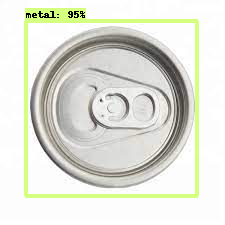

In [46]:
"""
Object Detection From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:  
    tf.config.experimental.set_memory_growth(gpu, True)

# Provide Path to Image Directory
IMAGE_PATHS = "/content/download (2).jpg"
# Provide Path to Model Directory
PATH_TO_MODEL_DIR = "/content/obj_detection_waste/exported_model/my_model"
# Provide Path to Label Map
PATH_TO_LABELS = "/content/obj_detection_waste/annotations/label_map.pbtxt"
# Provide The Minimum Confidence Threshold
MIN_CONF_THRESH = float(0.60)

# Load The Model
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

#Load Label Map Data For Plotting
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))



print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)


# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)


num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
        image_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=0.5,
        agnostic_mode=False)


print('Done')
cv2_imshow(image_with_detections)

## Convert to TFLite Format

In [33]:
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [40]:
export_dir = "/content/obj_detection_waste/exported_model_tflite/my_model/saved_model"

In [41]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [42]:
tflite_model_file = 'detection_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [43]:
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))